In [1]:
import os
import time
import sys
import fileinput
import numpy as np
from itertools import product, combinations
from collections import OrderedDict
import matplotlib
import matplotlib.pylab as plot
import math
import glob

In [2]:
filenames=[]
filenames_cos10=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos1.0*.tra')
filenames_cos09=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos0.9*.tra')
filenames_cos08=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos0.8*.tra')
filenames_cos07=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos0.7*.tra')
filenames_cos06=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos0.6*.tra')
filenames_cos05=glob.glob('/data/slag2/rcaputo/AMEGO/Simulations/AMEGO4x4PerformancePlotTraFiles/*Cos0.5*.tra')
filenames.append(filenames_cos10)
filenames.append(filenames_cos09)
filenames.append(filenames_cos08)
filenames.append(filenames_cos07)
filenames.append(filenames_cos06)
filenames.append(filenames_cos05)
print len(filenames_cos10), len(filenames)

20 6


In [9]:
energy = []
angle = []
vetoed = []
triggered = []
not_triggered = []
czt_top_trigger = []
czt_side_trigger = []
csi_trigger = []
si_trigger = []
CZT_Top_Found = False
CZT_Side_Found = False
CSI_Found = False
SI_Found = False
#finput = fileinput.input("FarFieldPointSource_3162.277MeV_Cos1.0.inc1.id1.tra")
finput = fileinput.input(filenames[0])
for line in finput:
    if "OriginalFile" in line:
        linecontents = line.split('_')
        energy.append(float(linecontents[2].replace('MeV','')))
        half=linecontents[3].split('.inc1')
        angle.append(float(half[0].replace('Cos','')))
        CZT_Top_Found = False
        CZT_Side_Found = False
        CSI_Found = False
        SI_Found = False
        print linecontents[2], half[0]
        
    if "Not triggered events" in line:
        linecontents = line.split()
        not_triggered.append(float(linecontents[4])/100000.)
        print "Not triggered events: ", float(linecontents[4])/100000.
    if "Number of vetoed events" in line:
        linecontents = line.split()
        vetoed.append(float(linecontents[5])/100000.)
        print "Number of vetoed events: ", float(linecontents[5])/100000.
    if "Number of triggered events" in line:
        linecontents = line.split()
        triggered.append(float(linecontents[5])/100000.)
        print "Number of triggered events: ", float(linecontents[5])/100000.
    if "MainTriggerCZT:" in line:
        linecontents = line.split()
        czt_top_trigger.append(float(linecontents[2])/100000.)
        CZT_Top_Found=True
        print "...CZT top triggered events: ", float(linecontents[2])/100000.  
    if "MainTriggerCZTSide" in line:
        linecontents = line.split()
        czt_side_trigger.append(float(linecontents[2])/100000.)
        CZT_Side_Found=True
        print "...CZT side triggered events: ", float(linecontents[2])/100000.
    if "MainTriggerCsI" in line:
        linecontents = line.split()
        csi_trigger.append(float(linecontents[2])/100000.)
        CSI_Found=True
        print "...CsI triggered events: ", float(linecontents[2])/100000.
    if "MainTriggerSi" in line:
        linecontents = line.split()
        si_trigger.append(float(linecontents[2])/100000.)
        SI_Found=True
        print "...Si triggered events: ", float(linecontents[2])/100000.
        
    if "STOP" in line:
        if CZT_Top_Found==False:
            czt_top_trigger.append(0.)
            print "No CZT Top triggers found"
        if CZT_Side_Found==False:
            czt_side_trigger.append(0.)
            print "No CZT Side triggers found"
        if CSI_Found==False:
            csi_trigger.append(0.)
            print "No CsI triggers found"
        if SI_Found==False:
            si_trigger.append(0.)
            print "No Si triggers found"
    
finput.close()     

#print energy, angle, si_trigger, czt_top_trigger, czt_side_trigger, csi_trigger

0.158MeV Cos1.0
Not triggered events:  0.55386
Number of vetoed events:  0.0
Number of triggered events:  0.44614
...CZT top triggered events:  0.07887
...CZT side triggered events:  0.36726
...CsI triggered events:  1e-05
No Si triggers found
0.316MeV Cos1.0
Not triggered events:  0.2244
Number of vetoed events:  0.0
Number of triggered events:  0.7756
...CZT top triggered events:  0.1932
...CZT side triggered events:  0.58229
...CsI triggered events:  0.00011
No Si triggers found
0.501MeV Cos1.0
Not triggered events:  0.15039
Number of vetoed events:  0.0
Number of triggered events:  0.84961
...CZT top triggered events:  0.23961
...CZT side triggered events:  0.60649
...CsI triggered events:  0.00351
No Si triggers found
1.000MeV Cos1.0
Not triggered events:  0.10218
Number of vetoed events:  0.01243
Number of triggered events:  0.88539
...CZT top triggered events:  0.33237
...CZT side triggered events:  0.51892
...CsI triggered events:  0.0341
No Si triggers found
1.584MeV Cos1.0
No

In [10]:
#Convert to an array
energy=np.array(energy)
vetoed=np.array(vetoed)
triggered=np.array(triggered)
not_triggered=np.array(not_triggered)
czt_top_trigger=np.array(czt_top_trigger)
czt_side_trigger=np.array(czt_side_trigger)
csi_trigger=np.array(csi_trigger)
#print len(csi_trigger), len(czt_side_trigger)

#Sort everything
t=[np.argsort(energy)]
energy=energy[t]
vetoed=vetoed[t]
triggered=triggered[t]
not_triggered=not_triggered[t]
czt_top_trigger=czt_top_trigger[t]
czt_side_trigger=czt_side_trigger[t]
csi_trigger=csi_trigger[t]

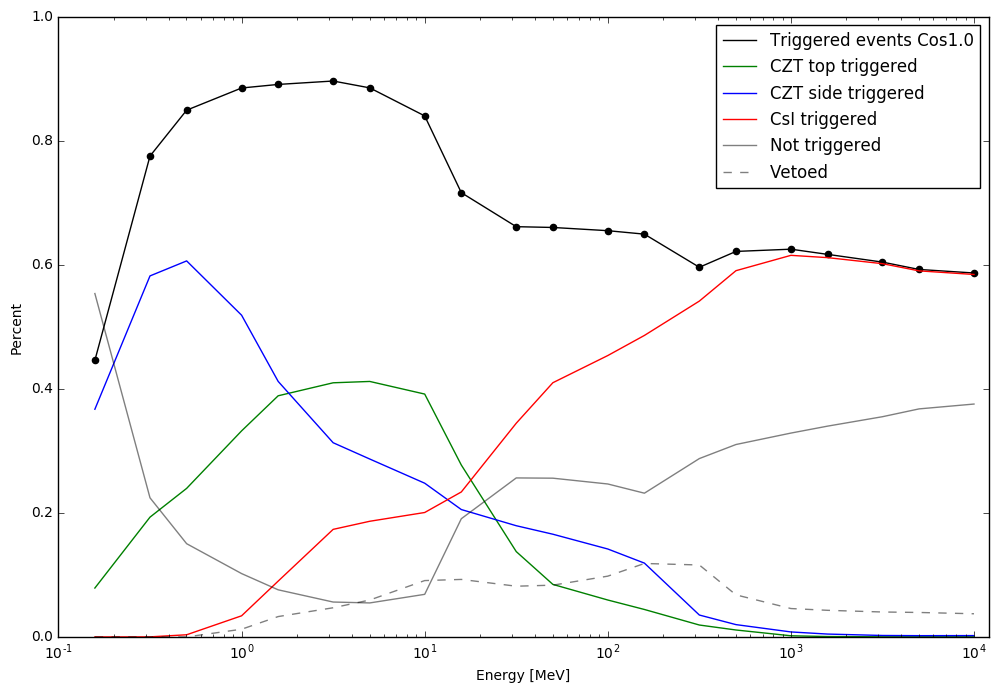

In [11]:
plot.figure(figsize=(12,8))
plot.scatter(energy,triggered, color='black')
plot.plot(energy,triggered, color='black', label='Triggered events %s' % half[0])
plot.plot(energy,czt_top_trigger, color='green', label='CZT top triggered')
plot.plot(energy,czt_side_trigger, color='blue', label='CZT side triggered')
plot.plot(energy,csi_trigger, color='red', label='CsI triggered')

plot.plot(energy,not_triggered, color='black', label='Not triggered', alpha=0.5, ls='-')
plot.plot(energy,vetoed, color='black', label='Vetoed',alpha=0.5, ls='--')

plot.xscale('log')
plot.gca().set_ylim([0.,1.0])
plot.gca().set_xlim([0.1,12000.])
plot.ylabel("Percent")
plot.xlabel("Energy [MeV]")
plot.legend(numpoints=1, scatterpoints=1, frameon=True, loc='upper right')
plot.savefig('TriggerEfficiency_vs_Energy_%s.png' % half[0])
plot.show()